In [1]:
import json
import os
import requests
import warnings
from urllib.request import urlretrieve
import scanpy as sc
import anndata
import pandas as pd
import anndata as ad
# import the packages needed

/home/wruopeng/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:61: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


In [2]:
kpmp=sc.read('/scratch/yongqunh_root/yongqunh0/wruopeng/HuBMAP_KPMP/KPMP_v2/f337b525-c8f7-4c96-8cfe-f258a9f5ca48.h5ad')


In [9]:
kpmp

AnnData object with n_obs × n_vars = 1388643 × 35455
    obs: 'nCount_RNA', 'nFeature_RNA', 'library', 'percent.er', 'percent.mt', 'experiment_id', 'suspension_type', 'assay_ontology_term_id', 'donor_id', 'specimen', 'Conditions.Subtype', 'disease_ontology_term_id', 'diabetes_history', 'hypertension', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'region', 'percent.cortex', 'percent.medulla', 'tissue_type', 'tissue_ontology_term_id', 'Clusters', 'SubclassLevel3', 'SubclassLevel2', 'SubclassLevel1', 'CellStateLevel2', 'CellStateLevel1', 'Class', 'cell_type_ontology_term_id', 'ConditionCategory', 'TissueCollection', 'Race', 'AdjudicationCategory', 'Baseline eGFR (ml/min/1.73m2) (Binned)', 'SubclassLevel3_FullName', 'Age', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'fe

In [6]:
print(kpmp.X)

  (0, 11)	1.5687901
  (0, 20)	1.5687901
  (0, 21)	1.5687901
  (0, 29)	1.5687901
  (0, 38)	2.5178988
  (0, 41)	1.5687901
  (0, 44)	3.3180277
  (0, 45)	1.5687901
  (0, 48)	2.1519568
  (0, 59)	1.5687901
  (0, 66)	1.5687901
  (0, 111)	1.5687901
  (0, 113)	2.5178988
  (0, 156)	2.1519568
  (0, 196)	1.5687901
  (0, 445)	1.5687901
  (0, 576)	1.5687901
  (0, 742)	2.1519568
  (0, 976)	1.5687901
  (0, 1000)	1.5687901
  (0, 1004)	1.5687901
  (0, 1241)	1.5687901
  (0, 2170)	1.5687901
  (0, 2247)	1.5687901
  (0, 3028)	1.5687901
  :	:
  (1388642, 34941)	1.7867769
  (1388642, 34949)	2.3924584
  (1388642, 34957)	2.3924584
  (1388642, 34977)	1.7867769
  (1388642, 34982)	1.7867769
  (1388642, 35007)	1.7867769
  (1388642, 35012)	3.7077363
  (1388642, 35022)	1.7867769
  (1388642, 35072)	1.7867769
  (1388642, 35096)	2.3924584
  (1388642, 35125)	1.7867769
  (1388642, 35149)	1.7867769
  (1388642, 35187)	1.7867769
  (1388642, 35199)	1.7867769
  (1388642, 35211)	1.7867769
  (1388642, 35221)	1.7867769
  (1388642

In [2]:
kpmp_v1=sc.read('/scratch/yongqunh_root/yongqunh0/wruopeng/HuBMAP_KPMP/kpmp-sn-raw-rnaseq.h5ad')

In [3]:

df = pd.read_csv("outer-cortex-datasets.csv")

# Extract IDs only from HuBMAP URLs
ids = []
for url in df["dataset"].astype(str):
    if "hubmapconsortium" in url:        # keep only HuBMAP
        entity_id = url.strip().split("/")[-1]
        ids.append(entity_id)

print(ids)

['0027cb59bcb4a34d5db83acaf934a9d9', '00318be0b7cfa3c6ed7fbeab08fe700b', '0110be17631ab95c722d476145feb00c', '0430a44e418219aafce608f4286b2a9b', '069a6930776ca28f8e10c3781aa13b56', '0b7015a55e38bd43b6cd6f58ddeb9059', '0cecd7cf1da6f81d3654c1712a5d61a2', '10b22d398b548c141167d4d9c4cbd79e', '15882fef75843d5cef518853a0e8246d', '17fb6d5db17936acc8fb613ce98ab808', '2553283ad2c4dfe0033ba752fe204551', '28d7789ef980031fb7278646fe43ffe1', '2a590db3d7ab1e1512816b165d95cdcf', '2d2356cf5b4eb114d958c31346c3dd2f', '2e4ae8b2f845f62e77cea46ef074981c', '2ee93cd3a39b317d58d3f308281a943e', '30a94db595b402bd813b020b0c51e233', '4348d5cf6485b949381a1c3358ab3f23', '44830922b634a9ecd4812b4f27ad4923', '450581eb06aeeb66419b4007d5e86baa', '4734034ae3026f586bab5269085ba0e6', '4e372aa4f8cfce62f2663c5ef810409a', '5137facf6f24b87d325b886ec8e5fb1f', '5a6470730104461ebb4358a11f70bd56', '5c57b3574a103e4990c8ed54cd82c6e6', '5f4e84e77fd0e4dec0c4d1cab468de15', '674116f3bb6c85dc933ea4ce6ffab05f', '67c6b239cf0986423273c874dd

In [4]:
base = "/scratch/yongqunh_root/yongqunh0/wruopeng/HuBMAP_KPMP/HuBMAP_datasets"

adata_list = []

for dataset_id in ids:
    file_path = f"{base}/{dataset_id}/expr.h5ad"
    
    if os.path.exists(file_path):
        print(f"Loading: {file_path}")
        adata = ad.read_h5ad(file_path)
        adata.obs["dataset_id"] = dataset_id   # tag dataset ID
        adata_list.append(adata)
    else:
        print(f"❌ File missing: {file_path}")

# Concatenate all datasets
adata_all_HUBMAP = ad.concat(adata_list, join="inner", label="sample_id", index_unique="-")

❌ File missing: /scratch/yongqunh_root/yongqunh0/wruopeng/HuBMAP_KPMP/HuBMAP_datasets/0027cb59bcb4a34d5db83acaf934a9d9/expr.h5ad
❌ File missing: /scratch/yongqunh_root/yongqunh0/wruopeng/HuBMAP_KPMP/HuBMAP_datasets/00318be0b7cfa3c6ed7fbeab08fe700b/expr.h5ad
❌ File missing: /scratch/yongqunh_root/yongqunh0/wruopeng/HuBMAP_KPMP/HuBMAP_datasets/0110be17631ab95c722d476145feb00c/expr.h5ad
❌ File missing: /scratch/yongqunh_root/yongqunh0/wruopeng/HuBMAP_KPMP/HuBMAP_datasets/0430a44e418219aafce608f4286b2a9b/expr.h5ad
❌ File missing: /scratch/yongqunh_root/yongqunh0/wruopeng/HuBMAP_KPMP/HuBMAP_datasets/069a6930776ca28f8e10c3781aa13b56/expr.h5ad
❌ File missing: /scratch/yongqunh_root/yongqunh0/wruopeng/HuBMAP_KPMP/HuBMAP_datasets/0b7015a55e38bd43b6cd6f58ddeb9059/expr.h5ad
❌ File missing: /scratch/yongqunh_root/yongqunh0/wruopeng/HuBMAP_KPMP/HuBMAP_datasets/0cecd7cf1da6f81d3654c1712a5d61a2/expr.h5ad
❌ File missing: /scratch/yongqunh_root/yongqunh0/wruopeng/HuBMAP_KPMP/HuBMAP_datasets/10b22d398b5

In [5]:
adata_all_HUBMAP.var_names

Index(['ENSG00000000003.15', 'ENSG00000000005.6', 'ENSG00000000419.13',
       'ENSG00000000457.14', 'ENSG00000000460.17', 'ENSG00000000938.13',
       'ENSG00000000971.16', 'ENSG00000001036.14', 'ENSG00000001084.13',
       'ENSG00000001167.14',
       ...
       'ENSG00000288635.1', 'ENSG00000288636.1', 'ENSG00000288637.1',
       'ENSG00000288638.1', 'ENSG00000288639.1', 'ENSG00000288640.1',
       'ENSG00000288642.1', 'ENSG00000288643.1', 'ENSG00000288644.1',
       'ENSG00000288645.1'],
      dtype='object', length=60286)

In [6]:
kpmp_v1.var_names

Index(['ENSG00000121410', 'ENSG00000268895', 'ENSG00000148584',
       'ENSG00000175899', 'ENSG00000245105', 'ENSG00000166535',
       'ENSG00000256661', 'ENSG00000256904', 'ENSG00000184389',
       'ENSG00000128274',
       ...
       'ENSG00000086827', 'ENSG00000174442', 'ENSG00000122952',
       'ENSG00000198205', 'ENSG00000198455', 'ENSG00000070476',
       'ENSG00000203995', 'ENSG00000162378', 'ENSG00000159840',
       'ENSG00000074755'],
      dtype='object', name='index', length=36368)

In [7]:
adata_all_HUBMAP

AnnData object with n_obs × n_vars = 1600657 × 60286
    obs: 'dataset_id', 'sample_id'
    layers: 'spliced', 'spliced_unspliced_sum', 'unspliced'

In [8]:
adata_all_HUBMAP.var_names = adata_all_HUBMAP.var_names.str.replace(r"\.\d+$", "", regex=True)

# Remove duplicate gene names
adata_all_HUBMAP = adata_all_HUBMAP[:, ~adata_all_HUBMAP.var_names.duplicated()]

In [9]:
kpmp_v1.obs.rename(
    columns={
        "library_id": "sample_id"
    },
    inplace=True
)

In [10]:
kpmp_v1

AnnData object with n_obs × n_vars = 304989 × 36368
    obs: 'sample_id', 'nCount_RNA', 'nFeature_RNA', 'percent.er', 'percent.mt', 'subclass.l2', 'subclass.l1', 'class', 'experiment_id', 'suspension_type', 'assay_ontology_term_id', 'organism_ontology_term_id', 'donor_id', 'specimen', 'disease_category', 'disease_ontology_term_id', 'eGFR', 'diabetes_history', 'hypertension', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'region', 'percent.cortex', 'percent.medulla', 'tissue_type', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'Age_binned', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'

In [11]:
kpmp_subset=kpmp_v1[kpmp_v1.obs['tissue']== 'cortex of kidney']

In [12]:
adata_combined = anndata.concat(
    [kpmp_subset, adata_all_HUBMAP],
    join="inner",  
    label="batch",        # name of new column in .obs
    keys=["KPMP", "HuBMAP"]  # labels for each dataset
)
adata_combined

AnnData object with n_obs × n_vars = 1802391 × 36297
    obs: 'sample_id', 'batch'

In [13]:
sc.pp.filter_cells(adata_combined, min_genes=200)
sc.pp.filter_genes(adata_combined, min_cells=3)

In [14]:
sc.pp.normalize_total(adata_combined, target_sum=1e4)
sc.pp.log1p(adata_combined)
sc.pp.scale(adata_combined, max_value=10)

In [50]:
# sc.pp.highly_variable_genes(
#     adata_combined,
#     n_top_genes=3000,
#     batch_key='sample_id'
# )

# # Subset to HVGs
# adata_combined = adata_combined[:, adata_combined.var['highly_variable']].copy()

2025-11-18 05:20:31,046 - harmonypy - INFO - Iteration 3 of 500
2025-11-18 05:27:06,296 - harmonypy - INFO - Converged after 3 iterations
2025-11-18 05:30:58.578290: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-18 05:30:58.594186: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-18 05:30:58.612561: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-18 05:30:58.617479: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to regis

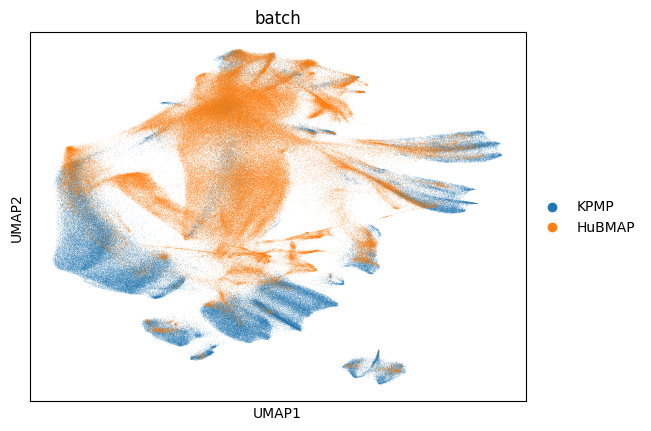

In [15]:
sc.pp.pca(adata_combined, n_comps=50)
sc.external.pp.harmony_integrate(adata_combined, key=['batch','sample_id'],
    max_iter_harmony=500)
sc.pp.neighbors(adata_combined, n_neighbors=50, n_pcs=50, use_rep='X_pca_harmony')
sc.tl.umap(adata_combined, min_dist=0.3)
sc.pl.umap(
    adata_combined,
    color=['batch'],
    save="scale_no_3000_batch_umap.png"   # file will be saved as figures/umap_batch_umap.png
)

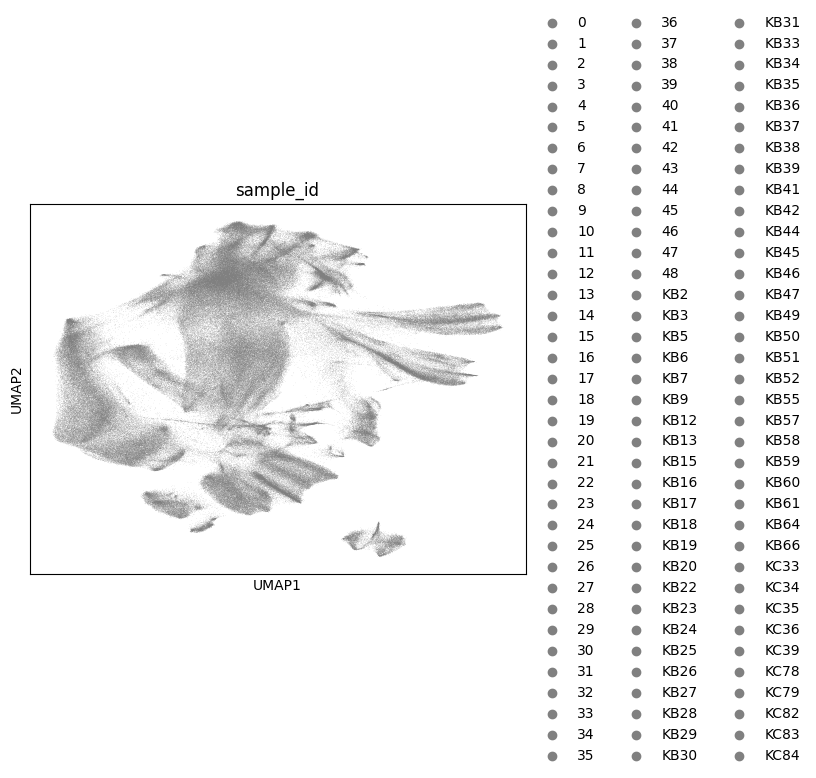

In [16]:
sc.pl.umap(
    adata_combined,
    color=['sample_id'],
    save="scale_no_3000_batch_umap.png"   # file will be saved as figures/umap_batch_umap.png
)